# The tutrial introduces an usage of `grasp2alm` which is based on Planck LevelS beam function.


In [1]:
%load_ext autoreload
%autoreload 2
import grasp2alm as g2a
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

Let's load beam files. GRASP grid and cut format are covered.


In [2]:
gridfile = "../grasp2alm/test/beam_files/test.grd"
cutfile = "../grasp2alm/test/beam_files/test.cut"
grid = g2a.BeamGrid(gridfile)
cut = g2a.BeamCut(cutfile)

`BeamGrid`, `BeamCut` and `BeamPolar` class has a method to plot a beam.
It has unit as dBi, and its operation as following:

$\mathrm{dBi} = 10\log_{10}(I)$

where $I$ representes intensity of the beam.

The co-pol (co) beam and cross-pol (cx) beam can be controled by argument `pol`.


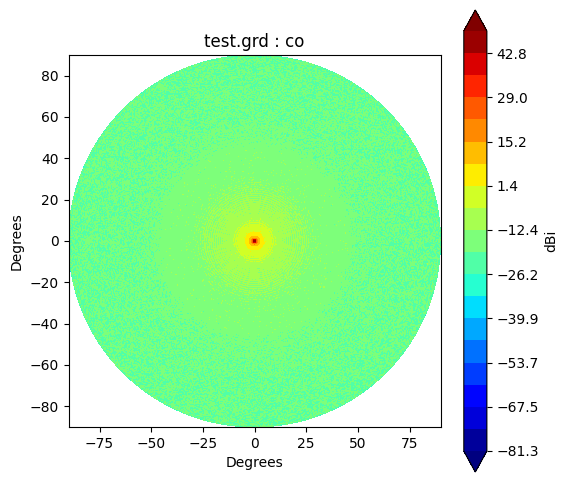

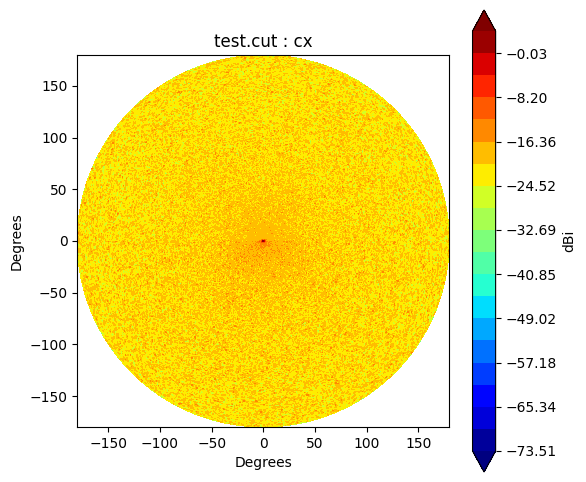

In [3]:
grid.plot(pol='co')
cut.plot(pol='cx')

`Beam*` class has method `to_polar` which converts grid/cut to Stoke parameter beams.

The instance after conversion has `BeamPolar` object.

It has the method to plot a Stokes beam as well.

Note that $Q$ and $U$ components will be projected after taking an absolute to avoid that $log()$ has negative value.


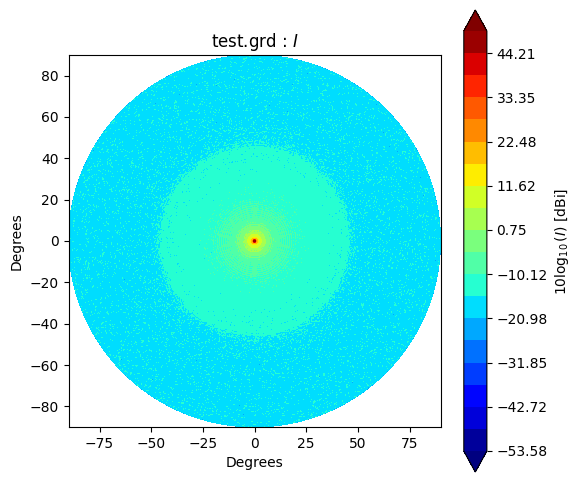

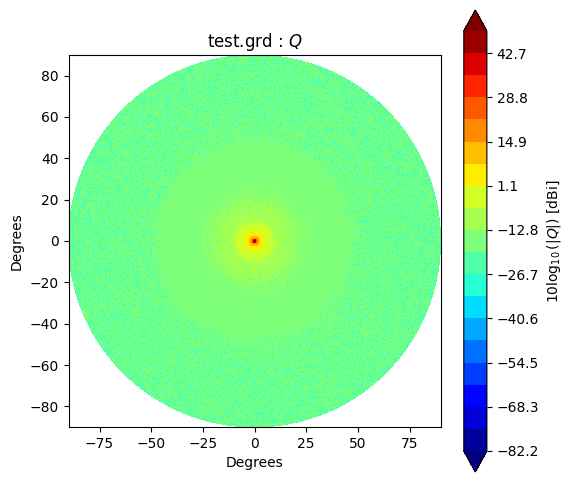

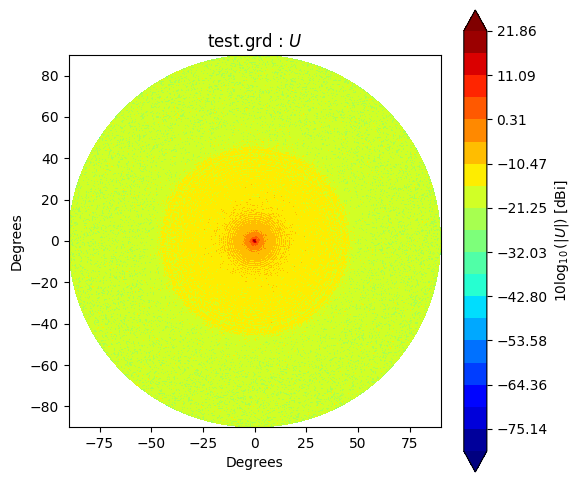

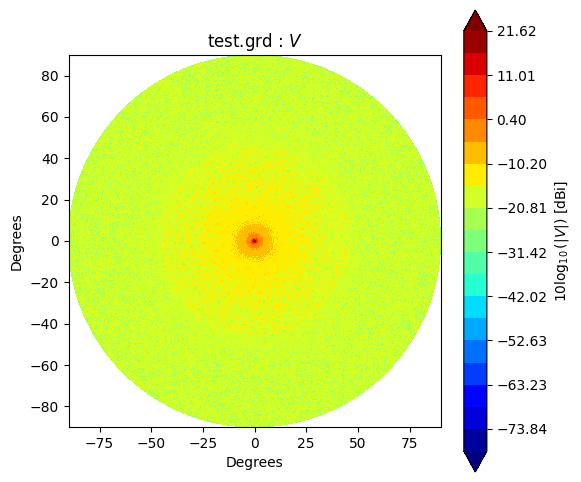

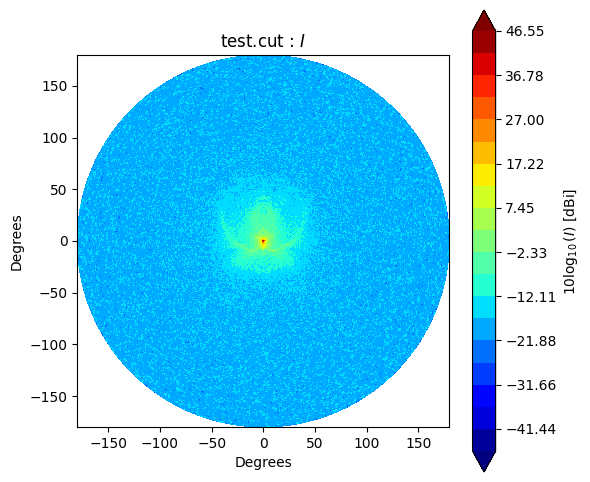

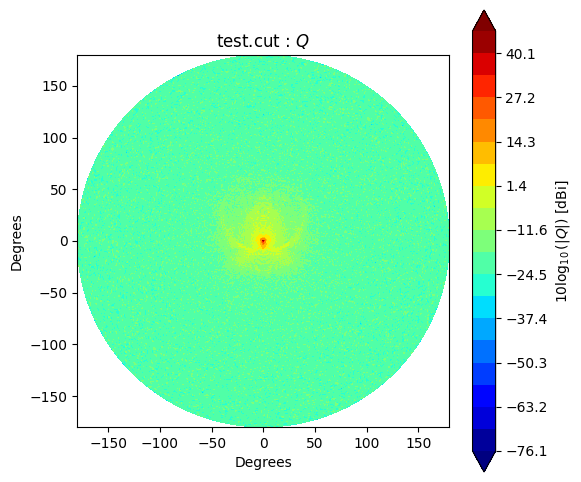

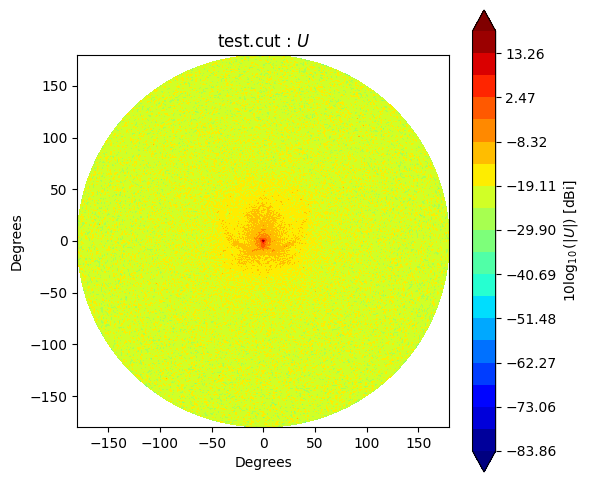

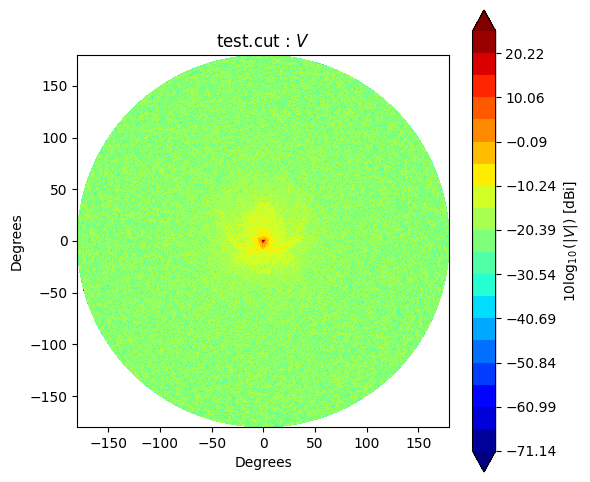

In [4]:
g2aolar = grid.to_polar(copol_axis="x")
cpolar = cut.to_polar(copol_axis="x")
stokes = ["I", "Q", "U", "V"]
for s in stokes:
    g2aolar.plot(s)
for s in stokes:
    cpolar.plot(s)

If you would like to make and accsess the beam plot, you can add `return_fields=True` to every `plot()` method.
It returns `x`, `y` and `z` values to make a plot.


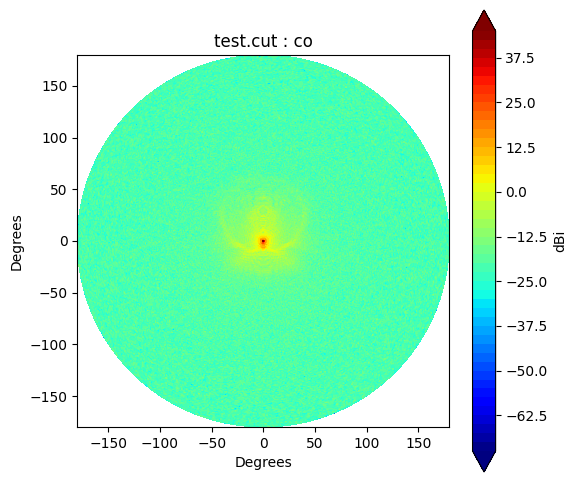

In [5]:
pol = "co"
x,y,z = cut.plot(pol=pol, return_fields=True)
figsize = 6
plt.figure(figsize=(figsize,figsize))
plt.axes().set_aspect("equal")
plt.title(f"{cut.filename} : {pol}")
plt.xlabel("Degrees")
plt.ylabel("Degrees")
plt.contourf(x, y, 10*np.log10(z), levels=50, cmap='jet', extend='both')
plt.colorbar(orientation="vertical", label="dBi");

`BeamPolar` has a method `to_map` which converts a Stokes beam to HEALPix beam map with specified `nside` as an argument.

After its operation, new object `BeamMap` will be generated as an instance.

The beam area that doesn't have values depending on the GRASP simulation, especially a backside of feed is not often simulated.

By setting `outOftheta_val`, we can control the value in sky pixel where is not covered by GRASP.


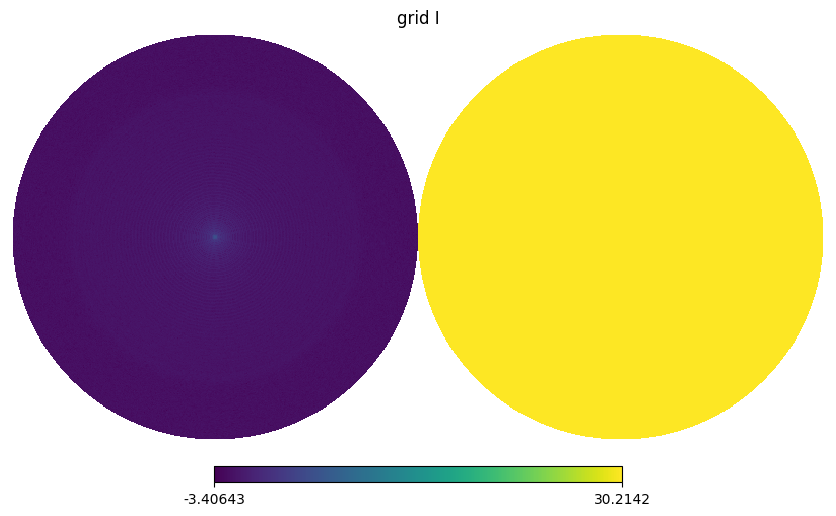

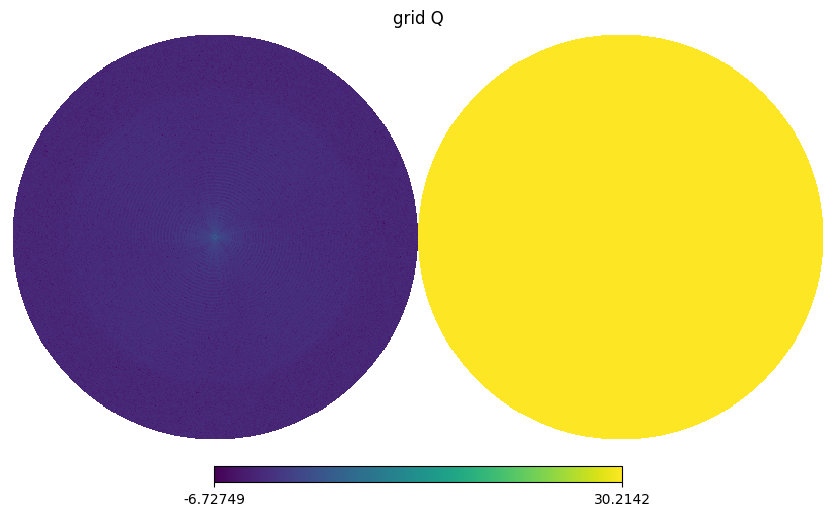

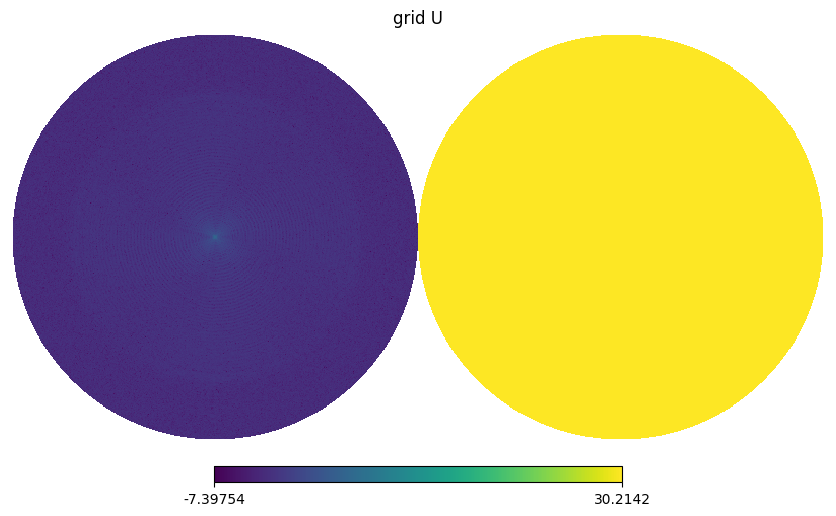

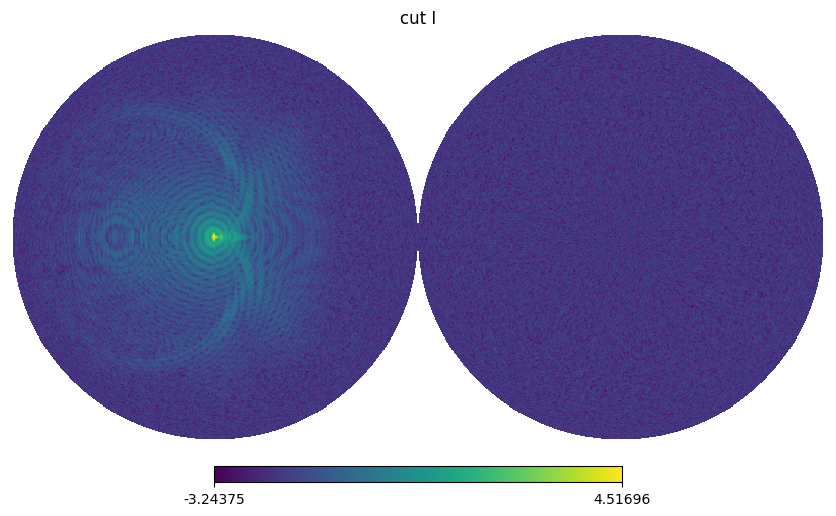

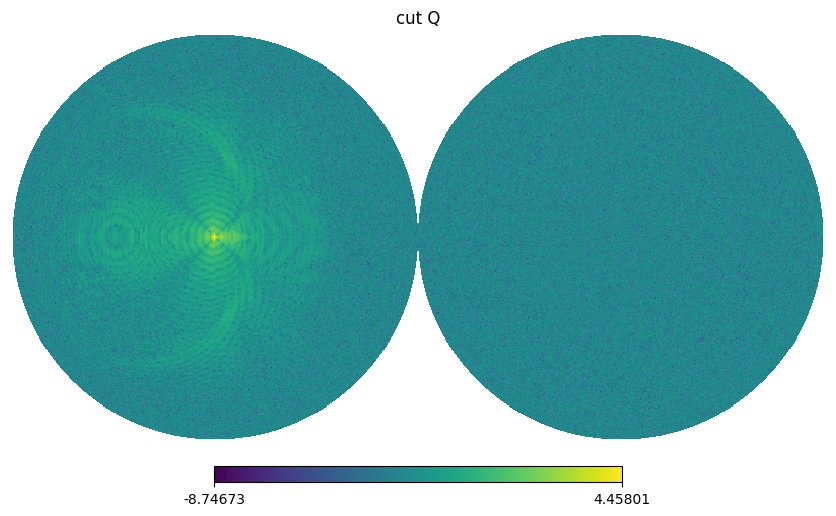

In [11]:
nside = 256
outOftheta_val = hp.UNSEEN # Default
gmap = g2aolar.to_map(nside, outOftheta_val=outOftheta_val)
cmap = cpolar.to_map(nside, outOftheta_val=outOftheta_val)
for i,s in enumerate(stokes[:3]):
    hp.orthview(np.log10(np.abs(gmap.map[i])), title=f"grid {s}", rot=(0,90))
for i,s in enumerate(stokes[:2]):
    hp.orthview(np.log10(np.abs(cmap.map[i])), title=f"cut {s}", rot=(0,90))

`BeamMap` has a method `to_alm` which expands a beam map to spherical harmonics coefficients i.e. $b_{lm}$ with specified `lmax` and `mmax`.


In [7]:
galm = gmap.to_alm()
calm = cmap.to_alm()

There is a function `grasp2alm` that includes every operation which is needed to obtain `alm` from the GRASP grid or cut file.


In [12]:
galm_ = g2a.grasp2alm(gridfile, nside)
calm_ = g2a.grasp2alm(cutfile, nside)

In [ ]:
lmax = 3*nside-1
mmax = lmax
galm_lsq = gmap.to_alm_lsq(lmax, mmax)
calm_lsq = cmap.to_alm_lsq(lmax, mmax)
galm_lsq_ = g2a.grasp2alm_lsq(gridfile, nside, lmax, mmax)
calm_lsq_ = g2a.grasp2alm_lsq(cutfile, nside, lmax, mmax)